<a href="https://colab.research.google.com/github/luciansantana/olympic-games/blob/master/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O banco de dados utilizado neste notebook, se trata de informações dos atletas que disputaram os Jogos Olímpicos durante anos de 1986 a 2016.

# Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import numpy as np


# Lendo e conhecendo o banco de dados

In [8]:
athlets = pd.read_csv("https://raw.githubusercontent.com/luciansantana/olympic-games/master/athlete_events.csv?token=AO27OWE4WTSMJ7U6ALCDJXC63LZV4")
athlets.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [0]:
athlets.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
athlets.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Estas são então as váriaveis disponiveis no banco de dados

In [11]:
medalist = athlets.dropna(subset = ["Medal"])
medalist['Team'].value_counts()

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
                 ... 
Rostock             1
Bermuda             1
Turquoise-1         1
Sudan               1
Nepal               1
Name: Team, Length: 498, dtype: int64

Temos então Estados Unidos liderando o ranking de medalhas, sendo seguido pela União Sovietica.

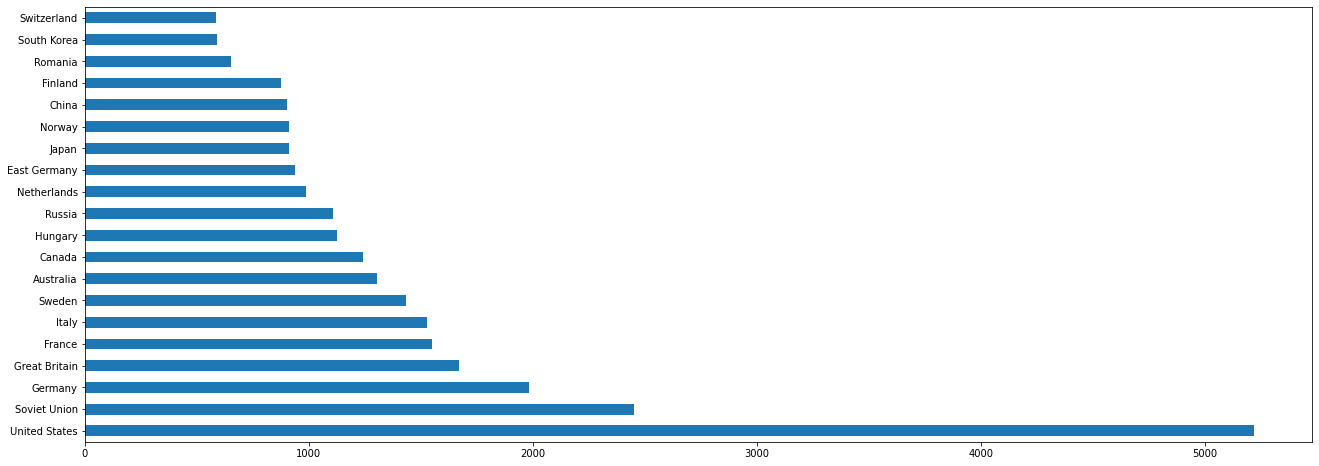

In [0]:
medalist['Team'].value_counts()[:20].plot(kind ='barh',figsize = (22,8))

Vale destacar a soberania da nação americana diantes os outros. Outro ressalva em função com a unidade fedarativa Rússia, por questões politicas e historicas, a nação disputou em momentos diferentes da história com dois nomes em vigencia: Russia(RUS) e Soviet Unian(URS).

Houve então, um agrupamento dos atletas que levam o nome de Soviet Union e Russia, para Russia Federation

In [0]:
athlets['Team'] = athlets['Team'].replace(to_replace = ['Soviet Union','Russia'],value = 'Russia Federation')
athlets['NOC'] = athlets['NOC'].replace(to_replace = ['URS'],value = 'RUS')


In [0]:
medalist['Team'].value_counts()

United States        5219
Russia Federation    3561
Germany              1984
Great Britain        1673
France               1550
                     ... 
Clearwater              1
Cicely-1                1
Sudan                   1
England                 1
Senegal                 1
Name: Team, Length: 497, dtype: int64

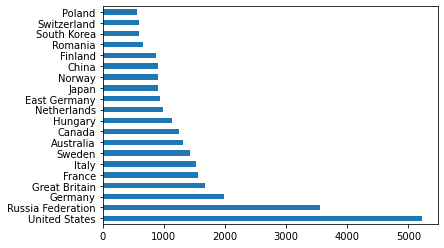

In [0]:
medalist['Team'].value_counts()[:20].plot(kind = 'barh',figsize = (22,8))

Com isso a União Federativa da Rússia chegando a 3561 atletas com medalhas conquistadas, 1658 a menos que o Estados Unidos e 1577 a mais que a Alemanha 

In [0]:
athlets['City'].value_counts()[:20]

London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Los Angeles       12423
Seoul             12037
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Tokyo              7702
Moskva             7191
Paris              7169
Berlin             6506
Amsterdam          4992
Sochi              4891
Name: City, dtype: int64

 A cidade em que mais foi palco de atrações olímpicas foi Londres (Inglaterra), e em seguida Athina (Grécia) e Sidney (Austrália)

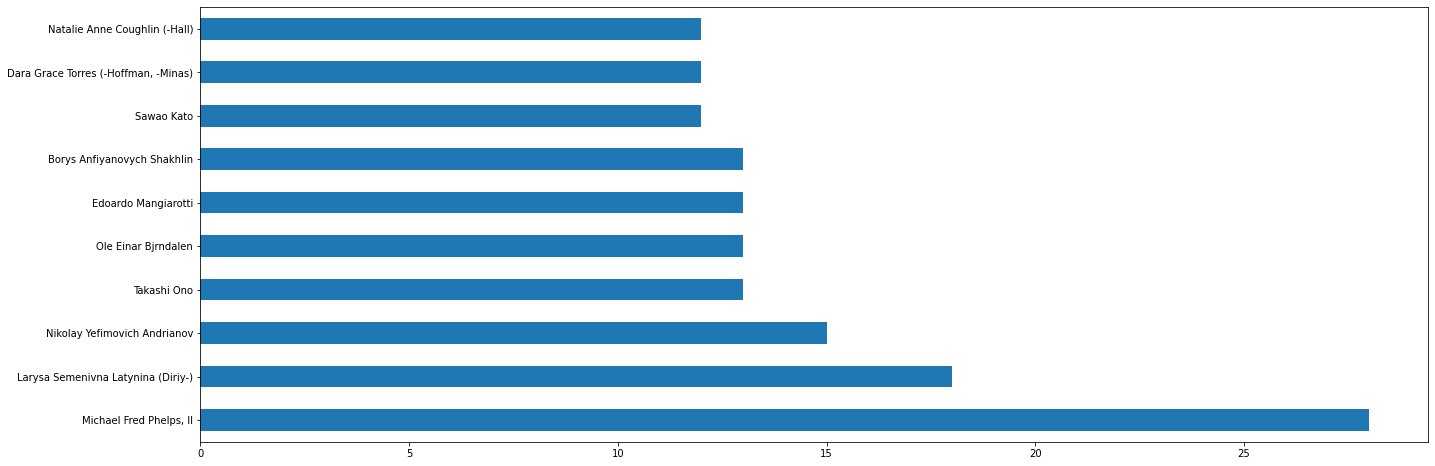

In [0]:
medalist['Name'].value_counts()[:10].plot(kind = 'barh',figsize = (22,8))

O atleta com mais medalhas na historia das olimpiadas, é Michael Fred Phelps, nadador que até então se encontra aposentado. Disputou as olimpiadas entre as edições de 2000 a 2016

In [0]:
phelps = athlets[athlets['Name']=='Michael Fred Phelps, II']
phelps['Medal'].value_counts()

Gold      23
Silver     3
Bronze     2
Name: Medal, dtype: int64

Michael Phelps disputou 30 medalhas, e conquistou 28 medalhas, o que mostra acaba mostrando a eficiencia do atleta americano. Das medalhas conquistadas, 23 são de ouro, o que representa o total de 82.14%.

# Análise histórica

Criando funções

In [0]:
def medalseason(noc):
  data0 = athlets[athlets['NOC']==noc]
  datax = athlets[athlets['Season']=='Summer']
  data0 = data0[data0['Season']=='Summer']
  data0_med = data0.dropna(subset = ['Medal'])
  year = datax.Year.unique()
  year = sorted(year)
  data2 = []
  for i in year:
    data1 = data0_med[data0_med['Year']==i]
    medalhas = data1.Medal.unique()
    medal2 = []
    for j in medalhas:
      medal0 = data1[data1['Medal']==j]
      medal1 = medal0.Event.unique().shape[0]
      medal2.append(medal1)
    soma = sum(medal2)
    data2.append(soma)
  #nomes = [noc]*len(year)
  #obj = {'Year': year,'Medals' : data2,'NOC': [noc]*len(year)}
  #data3 = pd.DataFrame(obj)

  return data2
def medalacum(noc):
  data0 = medalseason(noc)
  tamanho = range(1,len(data0))
  data2 = []
  for j in tamanho:
    #data0.iloc[j][1] = data0.iloc[j][1]+data0.iloc[j-1][1]
     data0[j]= data0[j]+data0[j-1]
  return data0



In [0]:
def geralacum():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalacum(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 1)
  data1.columns = noc
  data1.index = anos
  return data1
def geralseason():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalacum(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 1)
  data1.columns = noc
  data1.index = anos
  return data1



In [0]:
tabelacum = geralacum()
tabelasea = geralseason()

NameError: ignored

In [0]:
tabelageral.plot(x = 'Year',y = 'Medals',labels = 'NOC',figsize = (22,8))

In [0]:
#tabelageral[tabelageral['Year']==2016][:20].plot(x = 'NOC',y = 'Medals',kind = 'barh')
#df.groupby('product').size().plot(kind='bar')
#tabelageral[tabelageral['Year']==2016].groupby('NOC').plot(y = 'Medals',kind = 'barh')
ano2016 = tabelageral[tabelageral['Year']==2016]
ano2016.drop('Year',axis = 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


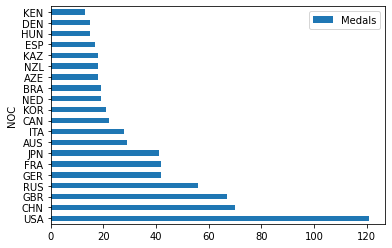

In [0]:
#ano2016.plot(x = 'NOC',y = 'Medals',figsize = (22,8),kind = 'barh')
ano2016_ajustado = ano2016.sort_values(by = 'Medals',ascending = False)
ano2016_ajustado[:20].plot(kind = 'barh',x = 'NOC')

#NOVA SAGA

In [0]:
acumulado = geralacum()

KeyError: ignored

# analise temporal

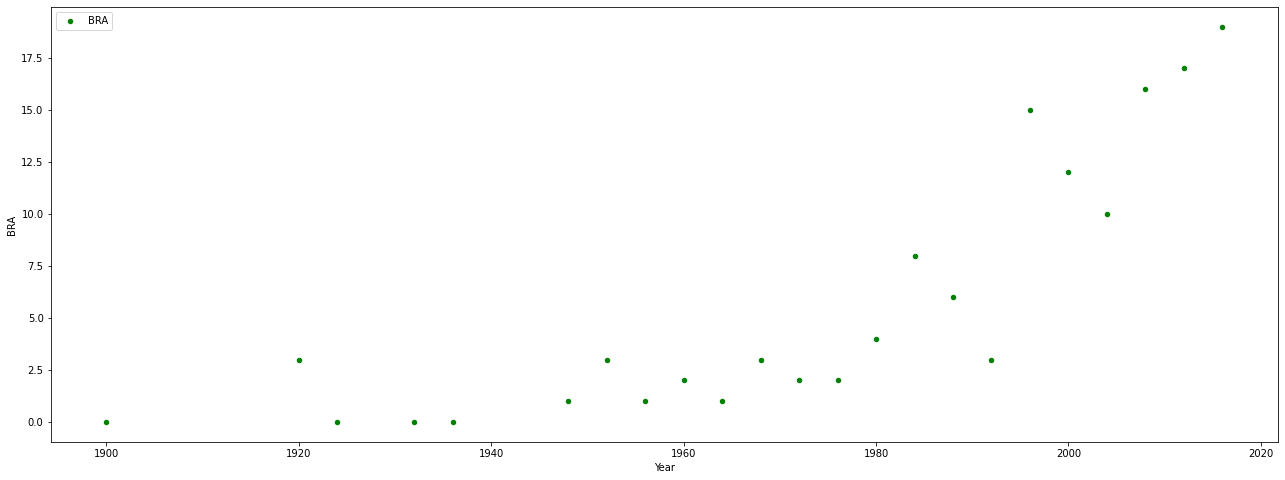

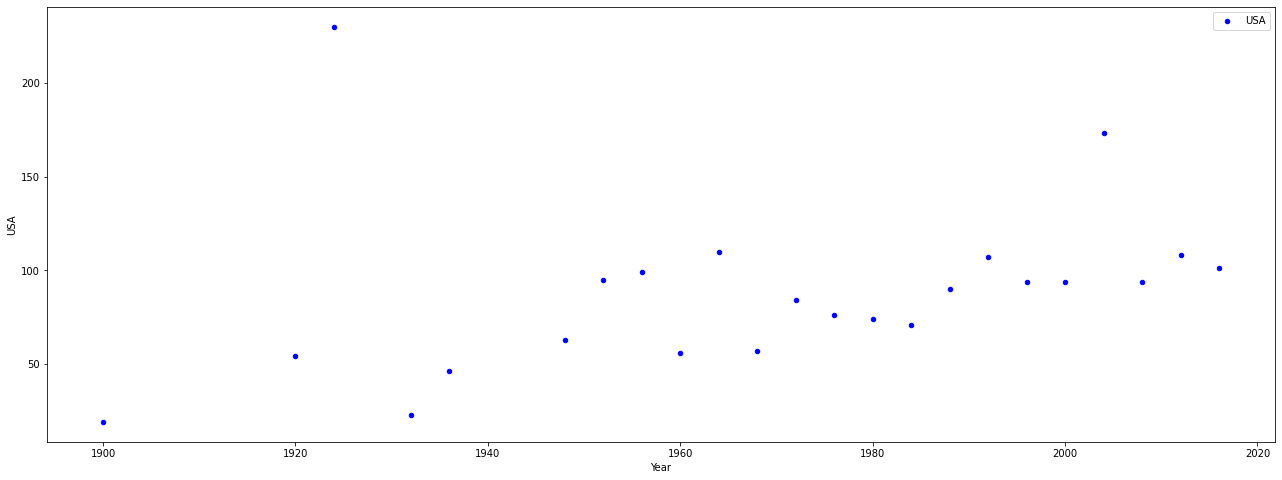

In [0]:
usa_season = medalseason("USA")
bra_season = medalseason("BRA")

obj = {'Year': bra_season['Year'],'BRA':bra_season['Medals'],'USA': usa_season['Medals']}
obj_data = pd.DataFrame(obj)
obj_data.plot.scatter(x = 'Year',y = 'BRA',label = 'BRA',color = 'green',figsize = (22,8))
obj_data.plot.scatter(x = 'Year',y = 'USA',label = 'USA',color = 'blue',figsize = (22,8))